In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set. Order data by date with recent first and display that row
results = engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()
results[0]


(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)

In [36]:
#Get the most recent date using the first row in cell above.
recent_date = [result[2] for result in results[:1]]
recent_date

['2017-08-23']

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

In [38]:
# Calculate the date one year from the last date in data set.
starting_date = recent_date - dt.timedelta(days=365)
starting_date

datetime.date(2016, 8, 23)

In [39]:
# Perform a query to retrieve the data and precipitation scores
date_range = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= starting_date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

dates_df = pd.DataFrame(date_range, columns = ["date", "prcp"])
dates_df





,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [40]:
# Sort the dataframe by date
dates_df.sort_values(by='date')

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [41]:
#Drop null values. Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html
dates_df = dates_df.dropna()
dates_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


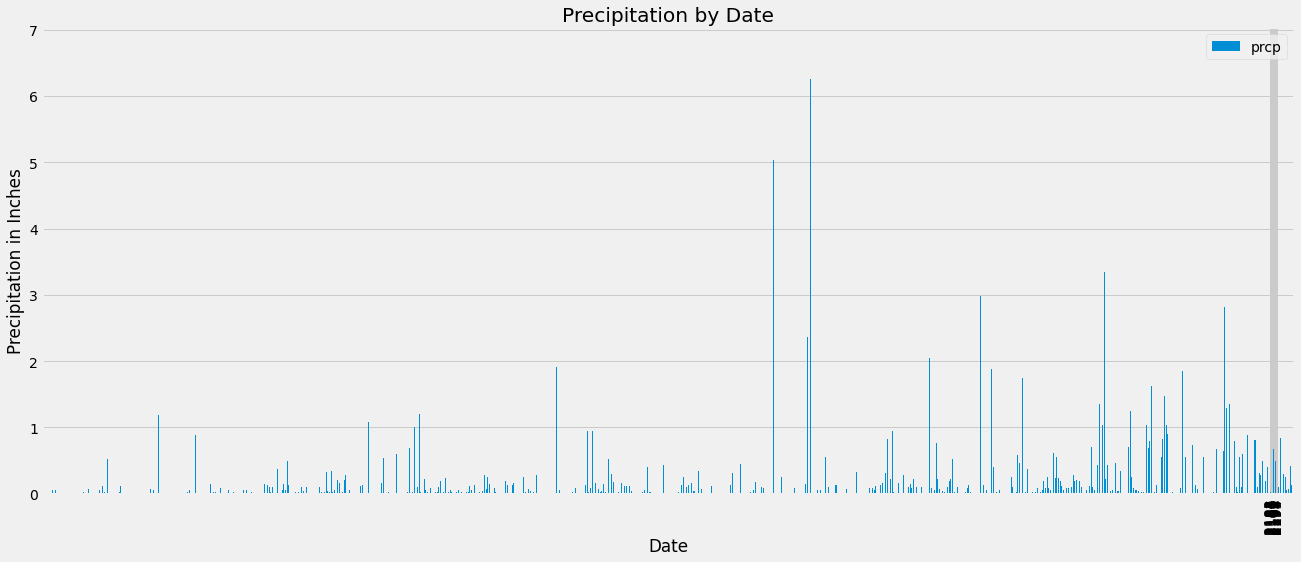

<Figure size 432x288 with 0 Axes>

In [58]:
# Use Pandas Plotting with Matplotlib to plot the data
climate_plot = dates_df.plot(kind="bar", title="Precipitation by Date", figsize=(20,8))
climate_plot.set_xticks([2016-8-23,2016-9-23,2016-10-23,2016-11-23, 2016-12-23, 2017-1-23, 2017-2-23, 2017-3-23, 2017-4-23, 2017-5-23, 2017-6-23, 2017-7-23,2017-8-23])
climate_plot.set_xlabel("Date")
climate_plot.set_ylabel("Precipitation in Inches")
plt.show()
plt.tight_layout()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dates_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [49]:
# Close Session
session.close()